In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import sqlite3
import statsmodels.api as sm

In [50]:
# Etape 1 : Chargement et exploration initiale des données
# Connexion à la base de données SQLite
conn = sqlite3.connect("/home/corolo/Desktop/europe_football/Football_Europ-en/data/raw/database.sqlite")
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [51]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:", tables['name'].tolist())


Available tables: ['sqlite_sequence', 'Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']


In [31]:
table_player = pd.read_sql_query("SELECT * FROM pLayer;", conn)

In [32]:
print("PLayer table :", table_player)

PLayer table :           id  player_api_id          player_name  player_fifa_api_id  \
0          1         505942   Aaron Appindangoye              218353   
1          2         155782      Aaron Cresswell              189615   
2          3         162549          Aaron Doran              186170   
3          4          30572        Aaron Galindo              140161   
4          5          23780         Aaron Hughes               17725   
...      ...            ...                  ...                 ...   
11055  11071          26357       Zoumana Camara                2488   
11056  11072         111182         Zsolt Laczko              164680   
11057  11073          36491            Zsolt Low              111191   
11058  11074          35506  Zurab Khizanishvili               47058   
11059  11075          39902   Zvjezdan Misimovic              102359   

                  birthday  height  weight  
0      1992-02-29 00:00:00  182.88     187  
1      1989-12-15 00:00:00  17

In [33]:
table_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes;", conn)

In [34]:
table_player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [35]:
table_team = pd.read_sql_query("SELECT * FROM Team;", conn)

In [36]:
table_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [37]:
table_match = pd.read_sql_query("SELECT * FROM Match;", conn)

In [39]:
table_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
import xml.etree.ElementTree as ET

# Define a function to parse the goal column
def parse_goal_column(xml_data):
    if pd.isna(xml_data):
        return []
    root = ET.fromstring(xml_data)
    goals = []
    for goal in root.findall("goal"):
        goal_info = {
            "player_id": goal.find("player1").text if goal.find("player1") is not None else None,
            "minute": goal.find("minute").text if goal.find("minute") is not None else None
        }
        goals.append(goal_info)
    return goals

# Apply parsing to the `goal` column
table_match['parsed_goals'] = table_match['goal'].apply(parse_goal_column)

# Create a separate DataFrame for goals
goal_data = []
for index, row in table_match.iterrows():
    for goal in row['parsed_goals']:
        goal_data.append({
            "match_id": row['match_api_id'],
            "player_id": goal['player_id'],
            "minute": goal['minute']
        })

goals_df = pd.DataFrame(goal_data)


In [43]:
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [53]:
table_player_new = table_player[['player_api_id','player_name', 'birthday', 'height', 'weight']]
table_player_new = pd.merge(table_player_attributes, table_player_new, on='player_api_id', how= 'left')
table_player_new


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [54]:
table_player_new = table_player_new.drop(columns=['id', 'player_fifa_api_id'])
table_player_new

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,...,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [56]:
table_match = pd.read_sql_query("SELECT * FROM Match;", conn)
table_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
match_column = table_match.columns.tolist()
match_column

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [59]:
match_column[77:85]

['goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']

In [60]:
import xml.etree.ElementTree as ET

def parse_goal_xml(xml_str):
    if not xml_str:
        return None  # Return None if the input is None or empty
    
    try:
        root = ET.fromstring(xml_str)
    except ET.ParseError:
        return None  # Return None if the XML cannot be parsed
    
    # Define the tags to extract
    tags = ['goals', 'shoton', 'elapsed', 'player1', 'player2', 'goal_type', 'team']
    
    # Extract the text for each tag and store it in a dictionary
    goal_data = {tag: (root.find(f'.//{tag}').text if root.find(f'.//{tag}') is not None else None) for tag in tags}
    
    return goal_data


In [ ]:
# Extract the 'goal' column containing XML strings
goal_xml_list = table_match['goal']  

# Parse the XML strings into structured data
parsed_goals = [parse_goal_xml(xml_str) for xml_str in goal_xml_list]

# Filter out None values (failed parses) and create a DataFrame from the structured data
filtered_goals = [goal for goal in parsed_goals if goal is not None]

goal_df = pd.DataFrame(filtered_goals)


In [62]:
goal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   goals      12903 non-null  object
 1   shoton     12857 non-null  object
 2   elapsed    13224 non-null  object
 3   player1    13215 non-null  object
 4   player2    7647 non-null   object
 5   goal_type  13222 non-null  object
 6   team       13222 non-null  object
dtypes: object(7)
memory usage: 777.6+ KB


In [64]:
# Extract the 'possession' column containing XML strings
possession_xml_list = table_match['possession']  # XML format

# Parse the XML strings into structured data
parsed_possessions = [parse_goal_xml(xml_str) for xml_str in possession_xml_list]

# Filter out None values (failed parses) and create a DataFrame from the structured data
filtered_possessions = [possession for possession in parsed_possessions if possession is not None]

possession_df = pd.DataFrame(filtered_possessions)

possession_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14217 entries, 0 to 14216
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   goals      0 non-null      object
 1   shoton     0 non-null      object
 2   elapsed    8419 non-null   object
 3   player1    0 non-null      object
 4   player2    0 non-null      object
 5   goal_type  1 non-null      object
 6   team       0 non-null      object
dtypes: object(7)
memory usage: 777.6+ KB


In [65]:
table_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
table_match_new = table_match[['id', 'country_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'goal']]
table_match_new

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,None
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,None
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,None
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,None
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,None
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,None
25975,25976,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,None
25976,25977,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,None
25977,25978,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,None


In [69]:
table_league = pd.read_sql_query("SELECT * FROM League;", conn)
table_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [70]:
# For quick overviews
table_match_new.head()
table_league.head()

# For detailed structure information
table_match_new.info()
table_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   season            25979 non-null  object
 3   stage             25979 non-null  int64 
 4   date              25979 non-null  object
 5   match_api_id      25979 non-null  int64 
 6   home_team_api_id  25979 non-null  int64 
 7   away_team_api_id  25979 non-null  int64 
 8   home_team_goal    25979 non-null  int64 
 9   goal              14217 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-nul

In [72]:
table_country = pd.read_sql_query("SELECT * FROM Country;", conn)
table_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [73]:
# Merge table_league and table_country by id
league_country_table = pd.merge(table_league, table_country, on='id', how='left')

# Drop the 'id' column after the merge
league_country_table = league_country_table.drop(['id'], axis=1)

# Rename columns for better clarity
league_country_table = league_country_table.rename(columns={'name_x': 'League', 'name_y': 'Country'})
league_country_table


,country_id,League,Country
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


In [76]:
table_team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes;", conn)
table_player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [78]:
# Select relevant columns from the team table
team_table = table_team[['team_api_id', 'team_long_name', 'team_short_name']]

# Merge team attributes with the team table
team_with_attributes = pd.merge(table_team_attributes, team_table, on='team_api_id', how='left')

# Drop unnecessary columns
team_with_attributes = team_with_attributes.drop(['team_fifa_api_id'], axis=1)

# Display the resulting DataFrame
team_with_attributes


,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1454,1455,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,...,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem,ZUL
1455,1456,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,...,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL
1456,1457,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,...,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem,ZUL


In [79]:
table_player_new

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,...,30.0,9.0,20.0,84.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183974,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183975,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176
183976,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,...,30.0,9.0,20.0,73.0,20.0,20.0,Zvjezdan Misimovic,1982-06-05 00:00:00,180.34,176


In [82]:
table_player_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   date                 183978 non-null  object 
 2   overall_rating       183142 non-null  float64
 3   potential            183142 non-null  float64
 4   preferred_foot       183142 non-null  object 
 5   attacking_work_rate  180748 non-null  object 
 6   defensive_work_rate  183142 non-null  object 
 7   crossing             183142 non-null  float64
 8   finishing            183142 non-null  float64
 9   heading_accuracy     183142 non-null  float64
 10  short_passing        183142 non-null  float64
 11  volleys              181265 non-null  float64
 12  dribbling            183142 non-null  float64
 13  curve                181265 non-null  float64
 14  free_kick_accuracy   183142 non-null  float64
 15  long_passing     

In [85]:
table_player_new['date'] = pd.to_datetime(table_player_new['date'], errors='raise')

In [86]:
table_player_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_api_id        183978 non-null  int64         
 1   date                 183978 non-null  datetime64[ns]
 2   overall_rating       183142 non-null  float64       
 3   potential            183142 non-null  float64       
 4   preferred_foot       183142 non-null  object        
 5   attacking_work_rate  180748 non-null  object        
 6   defensive_work_rate  183142 non-null  object        
 7   crossing             183142 non-null  float64       
 8   finishing            183142 non-null  float64       
 9   heading_accuracy     183142 non-null  float64       
 10  short_passing        183142 non-null  float64       
 11  volleys              181265 non-null  float64       
 12  dribbling            183142 non-null  float64       
 13  curve         

In [87]:
# Convert the 'goal' column to a list
goal_data_list = table_match_new['goal'].tolist()

# Extract match IDs
match_ids_list = table_match_new['match_api_id'].tolist()

# Filter rows where 'goal' column is not NaN
df_goals_non_nan = table_match_new.dropna(subset=['goal'])

# Function to parse goal data into a structured table
def parse_goals_to_dataframe(df_goals):
    goal_records = []

    for i, xml_data in enumerate(df_goals['goal']):
        if pd.notnull(xml_data):
            match_index = df_goals.index[i]
            season = df_goals['season'][match_index]
            
            # Parse the XML data
            try:
                root = ET.fromstring(xml_data)
            except ET.ParseError:
                continue
            
            for value in root.findall('value'):
                goal_record = {
                    'season': season,
                    'match_api_id': match_index,
                    'goals': value.find('stats/goals').text if value.find('stats/goals') is not None else None,
                    'shoton': value.find('stats/shoton').text if value.find('stats/shoton') is not None else None,
                    'elapsed': value.find('elapsed').text if value.find('elapsed') is not None else None,
                    'player1': value.find('player1').text if value.find('player1') is not None else None,
                    'player2': value.find('player2').text if value.find('player2') is not None else None,
                    'subtype': value.find('subtype').text if value.find('subtype') is not None else None,
                    'team': value.find('team').text if value.find('team') is not None else None,
                    'goal_type': value.find('goal_type').text if value.find('goal_type') is not None else None,
                }
                goal_records.append(goal_record)

    return pd.DataFrame(goal_records)

# Parse the goal data into a DataFrame
df_goals = parse_goals_to_dataframe(df_goals_non_nan)

# Display the resulting DataFrame
df_goals


,season,match_api_id,goals,shoton,elapsed,player1,player2,subtype,team,goal_type
0,2008/2009,1728,1,1,22,37799,38807,header,10261,n
1,2008/2009,1728,1,1,24,24148,24154,shot,10260,n
2,2008/2009,1729,1,1,4,26181,39297,shot,9825,n
3,2008/2009,1730,1,1,83,30853,30889,distance,8650,n
4,2008/2009,1731,1,1,4,23139,36394,shot,8654,n
...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,1,1,71,37554,None,None,10192,n
39976,2015/2016,25948,1,1,58,493418,None,None,9824,n
39977,2015/2016,25948,1,1,67,197757,None,None,10243,n
39978,2015/2016,25948,1,1,69,198082,None,None,10243,n


In [88]:
table_match_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   season            25979 non-null  object
 3   stage             25979 non-null  int64 
 4   date              25979 non-null  object
 5   match_api_id      25979 non-null  int64 
 6   home_team_api_id  25979 non-null  int64 
 7   away_team_api_id  25979 non-null  int64 
 8   home_team_goal    25979 non-null  int64 
 9   goal              14217 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.0+ MB


In [89]:
table_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [90]:
table_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [91]:
table_team_attributes

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [92]:
table_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [93]:
### Change date type
table_team_attributes['date'] = pd.to_datetime(table_team_attributes['date'], errors='raise')

### Fill null values in the 'buildUpPlayDribblingClass' column
print(table_team_attributes['buildUpPlayDribblingClass'].unique())

# Explore null values in the 'buildUpPlayDribbling' column based on class
class_list = list(table_team_attributes['buildUpPlayDribblingClass'].unique())
for class_type in class_list:
    class_data = table_team_attributes[table_team_attributes['buildUpPlayDribblingClass'] == class_type]
    missing_count = len(class_data['buildUpPlayDribbling']) - len(class_data[~class_data['buildUpPlayDribbling'].isna()])
    print(f"Number of missing data in {class_type} is: ", missing_count)

['Little' 'Normal' 'Lots']
Number of missing data in Little is:  969
Number of missing data in Normal is:  0
Number of missing data in Lots is:  0


In [94]:
# Describe 'buildUpPlayDribbling' for rows with 'Little' build-up play dribbling class
little_class_data = table_team_attributes[table_team_attributes['buildUpPlayDribblingClass'] == 'Little']
print(little_class_data['buildUpPlayDribbling'].describe())

### Fill NaN values in 'buildUpPlayDribbling' for 'Little' class with random values
table_team_attributes['buildUpPlayDribbling'] = np.where(
    (table_team_attributes['buildUpPlayDribbling'].isna()) & (table_team_attributes['buildUpPlayDribblingClass'] == 'Little'),
    np.random.randint(24, 34, size=table_team_attributes.shape[0]),
    table_team_attributes['buildUpPlayDribbling']
)

print(table_team_attributes.info())

count    35.000000
mean     30.485714
std       2.489642
min      24.000000
25%      29.000000
50%      32.000000
75%      32.000000
max      33.000000
Name: buildUpPlayDribbling, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            1458 non-null   float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPa

In [102]:
### Grouping overall_rating by player and date
overall_rating_per_season = table_player_new.groupby(['player_name', table_player_new['date'].dt.year])['overall_rating'].mean().reset_index()
overall_rating_per_season = overall_rating_per_season.sort_values(by=['overall_rating', 'date'], ascending=[False, True])

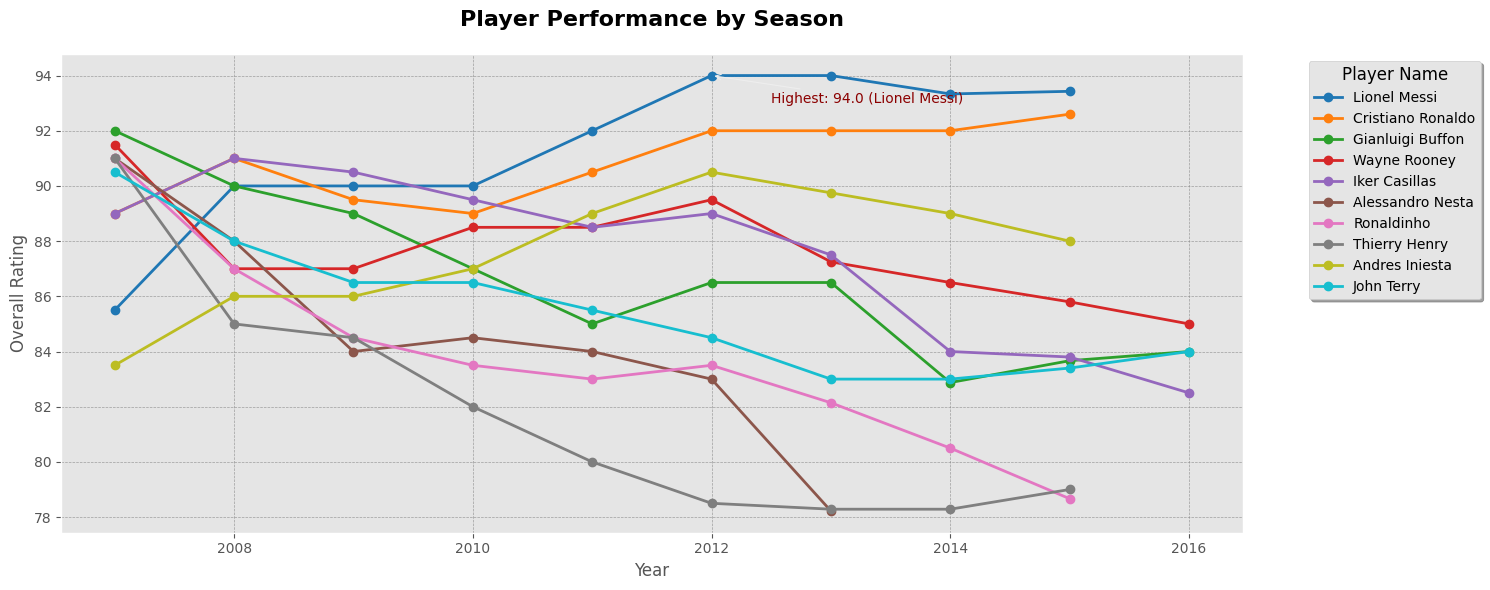

In [104]:
# Visualization of player ratings over seasons
plt.figure(figsize=(15, 6))

# Using an available style (fallback if seaborn-darkgrid is unavailable)
plt.style.use('ggplot')

# Colormap for distinct colors
colors = plt.cm.tab10.colors

# Plotting data for each top player
for idx, player in enumerate(top_rating_players['player_name']):
    player_data = overall_rating_per_season[overall_rating_per_season['player_name'] == player].sort_values(by='date', ascending=True)
    plt.plot(
        player_data['date'], 
        player_data['overall_rating'], 
        label=player, 
        marker='o', 
        markersize=6, 
        linewidth=2, 
        color=colors[idx % len(colors)]
    )

# Adding title, labels, and grid for better clarity
plt.title('Player Performance by Season', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjusting legend position and appearance
plt.legend(
    title='Player Name', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1), 
    frameon=True, 
    shadow=True
)

# Annotation for the highest rating
highest_rating = overall_rating_per_season['overall_rating'].max()
highest_player = overall_rating_per_season[overall_rating_per_season['overall_rating'] == highest_rating]['player_name'].values[0]
highest_year = overall_rating_per_season[overall_rating_per_season['overall_rating'] == highest_rating]['date'].values[0]

plt.annotate(
    f'Highest: {highest_rating:.1f} ({highest_player})', 
    xy=(highest_year, highest_rating), 
    xytext=(highest_year + 0.5, highest_rating - 1), 
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.8),
    fontsize=10,
    color='darkred'
)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


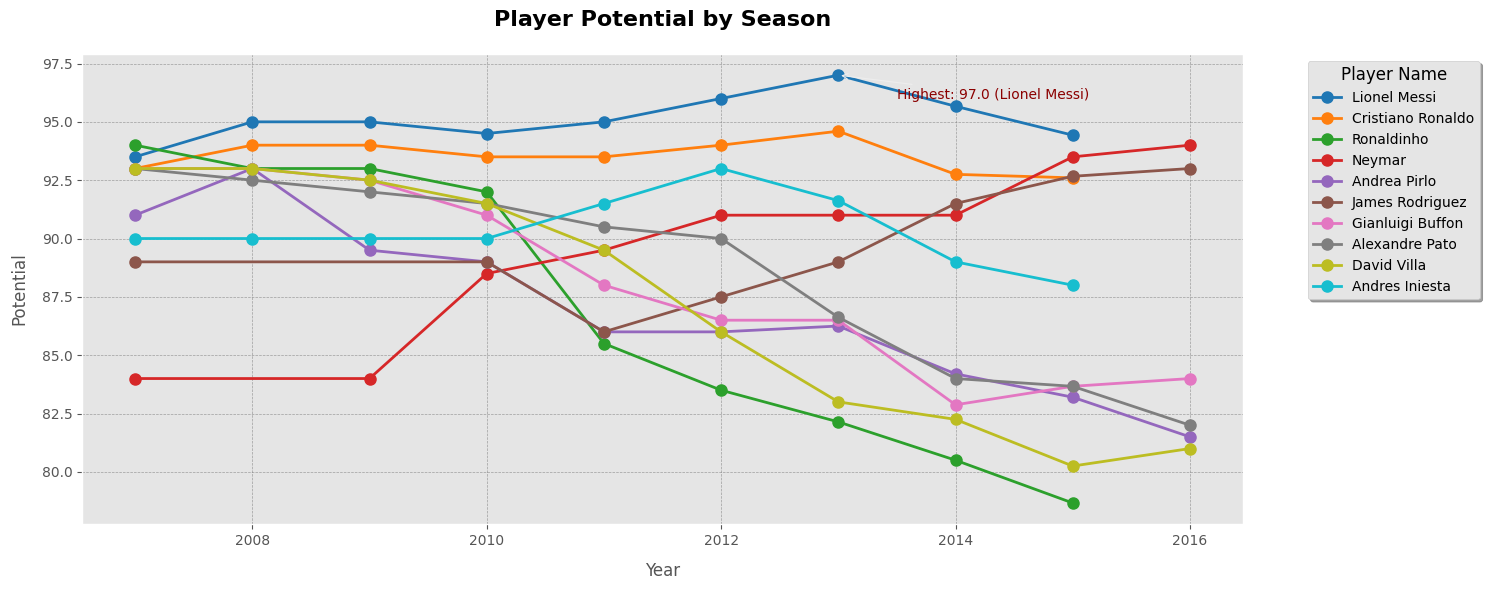

In [108]:
# Grouping potential by player_name and date
potential_per_s = table_player_new.groupby(['player_name', table_player_new['date'].dt.year])['potential'].mean().reset_index()

# Select top players by potential
top_pot_player = potential_per_s.sort_values(by='potential', ascending=False).drop_duplicates(subset='player_name').head(10)

# Visualization of player potential over seasons
plt.figure(figsize=(15, 6))

# Enhanced visualization style
plt.style.use('ggplot')

# Define a colormap for better distinction
colors = plt.cm.tab10.colors

# Plot data for each top player
for idx, player in enumerate(top_pot_player['player_name']):
    player_data = potential_per_s[potential_per_s['player_name'] == player].sort_values(by='date', ascending=True)
    plt.plot(
        player_data['date'], 
        player_data['potential'], 
        marker='o', 
        label=player, 
        linewidth=2, 
        markersize=8, 
        color=colors[idx % len(colors)]
    )

# Title and axis labels with improved formatting
plt.title('Player Potential by Season', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Potential', fontsize=12, labelpad=10)

# Adjust ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for visual clarity
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Enhance legend appearance
plt.legend(
    title='Player Name', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1), 
    frameon=True, 
    shadow=True
)

# Highlight the highest potential
highest_potential = potential_per_s['potential'].max()
highest_player = potential_per_s[potential_per_s['potential'] == highest_potential]['player_name'].values[0]
highest_year = potential_per_s[potential_per_s['potential'] == highest_potential]['date'].values[0]

plt.annotate(
    f'Highest: {highest_potential:.1f} ({highest_player})', 
    xy=(highest_year, highest_potential), 
    xytext=(highest_year + 0.5, highest_potential - 1), 
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.8),
    fontsize=10,
    color='darkred'
)

# Tight layout for improved spacing
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_316819/3202645412.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


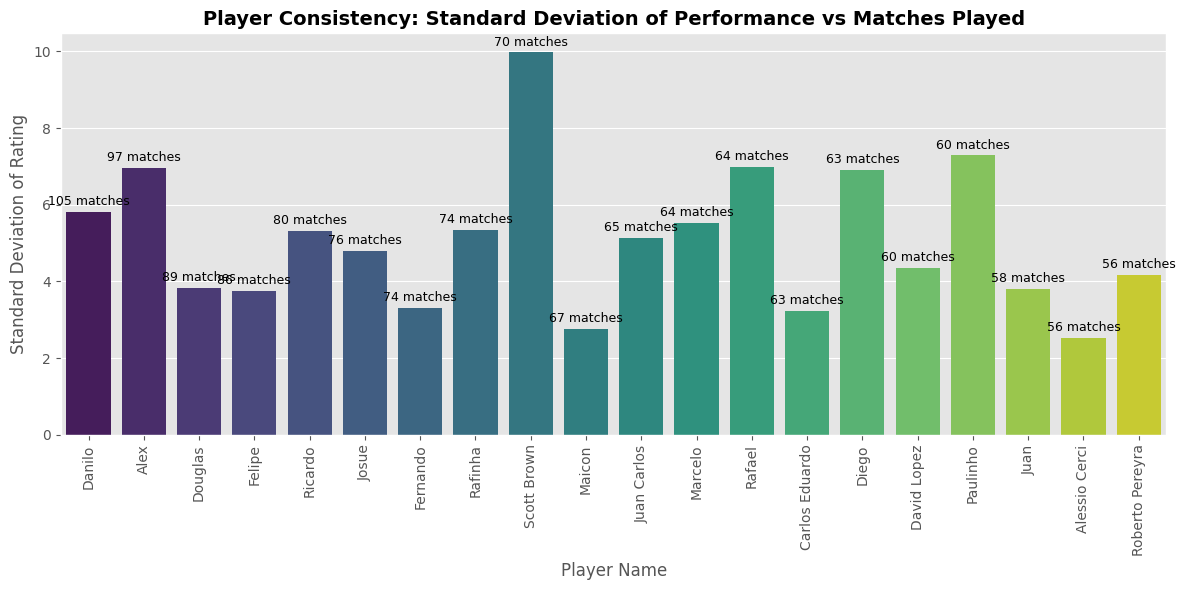

In [110]:
# Group overall_rating by player_name and date, counting occurrences
# This provides the overall_rating for each player on each date
overall_rating_per_day = (
    table_player_new.groupby(['player_name', 'date'])['overall_rating']
    .value_counts()
    .reset_index(name='count')
)

# Calculate player consistency metrics: standard deviation (std), mean rating, and number of matches played
player_consistency = (
    overall_rating_per_day.groupby('player_name')['overall_rating']
    .agg(std_dev='std', avg_rating='mean', match_played='count')
    .reset_index()
)

# Sort players by number of matches played (descending) and standard deviation (ascending)
most_consistent_players = player_consistency.sort_values(by=['match_played', 'std_dev'], ascending=[False, True])

# Select the top 20 players with the highest match counts and lowest standard deviations
top_consistent_players = most_consistent_players.head(20)

# Visualization of top 15 consistent players by match count and performance variability
plt.figure(figsize=(12, 6))

# Bar plot showing standard deviation of performance with match counts annotated
ax = sns.barplot(
    x='player_name', 
    y='std_dev', 
    data=top_consistent_players, 
    palette='viridis'
)

# Annotate match counts on top of the bars
for i, row in enumerate(top_consistent_players.itertuples()):
    ax.annotate(
        f"{row.match_played} matches",
        xy=(i, row.std_dev), 
        xytext=(0, 5),  
        textcoords='offset points',
        ha='center', fontsize=9, color='black'
    )

# Improve plot aesthetics
plt.xticks(rotation=90, fontsize=10)
plt.title('Player Consistency: Standard Deviation of Performance vs Matches Played', fontsize=14, fontweight='bold')
plt.xlabel('Player Name', fontsize=12)
plt.ylabel('Standard Deviation of Rating', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


In [113]:
# Group overall_rating by player_name and date, counting occurrences
# This gives the overall rating for each player on each date
player_ratings_per_day = (
    table_player_new.groupby(['player_name', 'date'])['overall_rating']
    .value_counts()
    .reset_index(name='rating_count')
)
player_ratings_per_day.head()


,player_name,date,overall_rating,rating_count
0,Aaron Appindangoye,2007-02-22,61.0,1
1,Aaron Appindangoye,2015-03-20,61.0,1
2,Aaron Appindangoye,2015-09-21,62.0,1
3,Aaron Appindangoye,2015-11-19,67.0,1
4,Aaron Appindangoye,2016-02-18,67.0,1


In [114]:
# Calculate player consistency based on overall_rating statistics
player_consistency = (
    player_ratings_per_day.groupby('player_name')['overall_rating']
    .agg(['std', 'mean', 'count'])
    .reset_index()
    .rename(columns={'std': 'std_dev', 'mean': 'avg_rating', 'count': 'matches_played'})
)

# Sort players by matches played and consistency
player_consistency_sorted = player_consistency.sort_values(by=['matches_played', 'std_dev'], ascending=[False, True])
player_consistency_sorted.head()


,player_name,std_dev,avg_rating,matches_played
2168,Danilo,5.813966,73.714286,105
396,Alex,6.969343,73.381443,97
2726,Douglas,3.822912,71.101124,89
3210,Felipe,3.740853,72.511628,86
8705,Ricardo,5.326314,70.100000,80


In [118]:
# Independent (X) and dependent (y) variables
X_consistency = sm.add_constant(player_consistency_sorted['matches_played'])
y_consistency = player_consistency_sorted['std_dev']

# Fit regression model
consistency_model = sm.OLS(y_consistency, X_consistency).fit()
print(consistency_model.summary())


                            OLS Regression Results                            
Dep. Variable:                std_dev   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1780.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:20:21   Log-Likelihood:                -21782.
No. Observations:               10848   AIC:                         4.357e+04
Df Residuals:                   10846   BIC:                         4.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7492      0.034     50.

In [120]:
# View the structure and details of the df_goal DataFrame
df_goals


,season,match_api_id,goals,shoton,elapsed,player1,player2,subtype,team,goal_type
0,2008/2009,1728,1,1,22,37799,38807,header,10261,n
1,2008/2009,1728,1,1,24,24148,24154,shot,10260,n
2,2008/2009,1729,1,1,4,26181,39297,shot,9825,n
3,2008/2009,1730,1,1,83,30853,30889,distance,8650,n
4,2008/2009,1731,1,1,4,23139,36394,shot,8654,n
...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,1,1,71,37554,None,None,10192,n
39976,2015/2016,25948,1,1,58,493418,None,None,9824,n
39977,2015/2016,25948,1,1,67,197757,None,None,10243,n
39978,2015/2016,25948,1,1,69,198082,None,None,10243,n


In [121]:
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39980 entries, 0 to 39979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        39980 non-null  object
 1   match_api_id  39980 non-null  int64 
 2   goals         35229 non-null  object
 3   shoton        34548 non-null  object
 4   elapsed       39980 non-null  object
 5   player1       39863 non-null  object
 6   player2       17069 non-null  object
 7   subtype       21551 non-null  object
 8   team          39946 non-null  object
 9   goal_type     39946 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [123]:
# Drop rows where player1 information is null
df_goals = df_goals.dropna(subset=['player1'])

# Convert player1 and player2 columns to integers
df_goals['player1'] = df_goals['player1'].astype(int)
df_goals['player2'].fillna(0, inplace=True)  # Fill null values in player2 with 0
df_goals['player2'] = df_goals['player2'].astype(int)

# Convert the goals column to numeric, filling errors with NaN
df_goals['goals'] = pd.to_numeric(df_goals['goals'], errors='coerce')

# Fill missing goal values with 1 (assuming 1 goal is the minimum if player1 exists)
df_goals['goals'].fillna(1, inplace=True)


/tmp/ipykernel_316819/2510844971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals['player1'] = df_goals['player1'].astype(int)
/tmp/ipykernel_316819/2510844971.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goals['player2'].fillna(0, inplace=True)  # Fill null values 

In [124]:
### change date type 
df_goals['goals']=pd.to_numeric(df_goals['goals'] , errors='coerce')
df_goals['goals'].fillna(1, inplace=True) ### fill goal by 1 is player1 column existe

/tmp/ipykernel_316819/615468945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals['goals']=pd.to_numeric(df_goals['goals'] , errors='coerce')
/tmp/ipykernel_316819/615468945.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_goals['goals'].fillna(1, inplace=True) ### fill 

In [125]:
### Merge table df_goals and table_player by player_api_id to include player names

# Merge for player1 (player_contribution)
df_goals = df_goals.merge(
    table_player[['player_api_id', 'player_name']],
    left_on='player1',
    right_on='player_api_id',
    how='left'
)
df_goals.rename(columns={'player_name': 'player_contribution'}, inplace=True)

# Merge for player2 (player_assist)
df_goals = df_goals.merge(
    table_player[['player_api_id', 'player_name']],
    left_on='player2',
    right_on='player_api_id',
    how='left'
)
df_goals.rename(columns={'player_name': 'player_assist'}, inplace=True)

# Drop unnecessary columns
df_goals.drop(columns=['player_api_id_x', 'player_api_id_y', 'player1', 'player2'], inplace=True)

# Extract year of the season
df_goals['season'] = df_goals['season'].apply(lambda x: int(x.split('/')[0]))

# Group number of goals by player and season
most_players_goal = df_goals.groupby(['player_contribution', 'season'])['goals'].sum().reset_index()

# Sort the results by season and goals in descending order
most_players_goal = most_players_goal.sort_values(by=['season', 'goals'], ascending=[True, False])

# Display the top rows for verification
print(most_players_goal.head())


     player_contribution  season  goals
9006        Samuel Eto'o    2008   33.0
2602        Diego Forlan    2008   32.0
2435         David Villa    2008   30.0
3934             Grafite    2008   28.0
2629        Diego Milito    2008   27.0


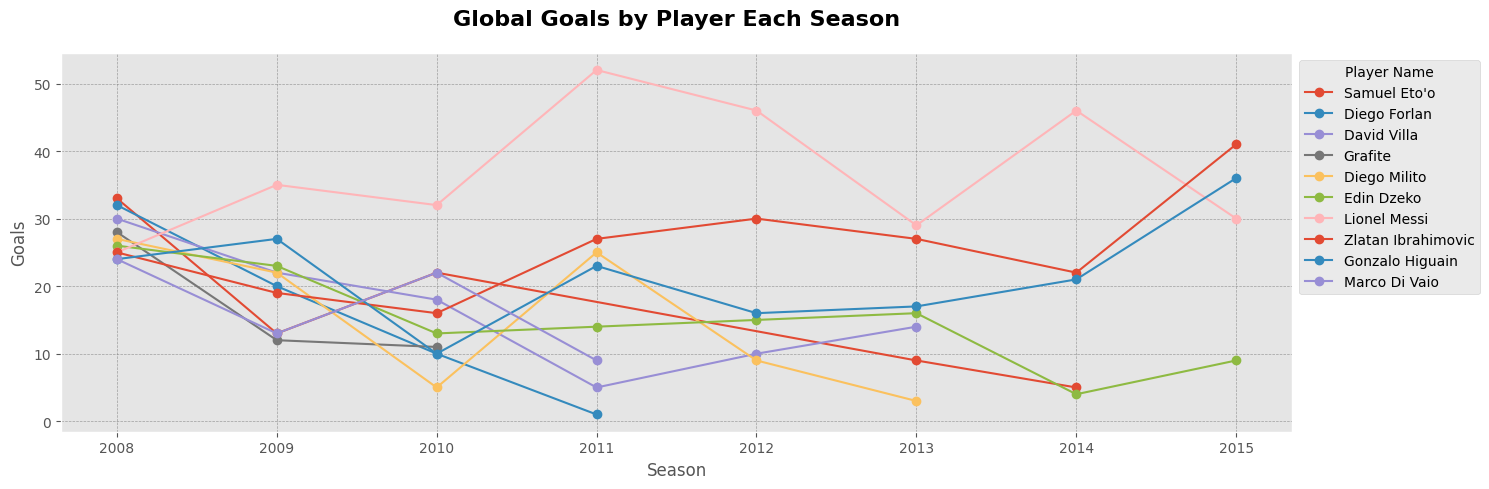

In [126]:
# Visualization of global goals by player each season
plt.figure(figsize=(15, 5))

# Get the top 10 players for plotting
player_cont = list(most_players_goal['player_contribution'].unique()[:10])

# Plot goals by player across seasons
for player in player_cont:
    player_data = most_players_goal[most_players_goal['player_contribution'] == player].sort_values(by='season')
    plt.plot(player_data['season'], player_data['goals'], marker='o', label=player)

# Customize the plot
plt.title('Global Goals by Player Each Season', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.legend(title='Player Name', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [139]:
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team'],
      dtype='object')


In [143]:
print(table_match_new.dtypes)
print(table_team.dtypes)


country_id              int64
stage                   int64
date                   object
match_api_id            int64
home_team_goal          int64
home_team              object
away_team              object
team_long_name         object
team_long_name_away    object
dtype: object
id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object


In [144]:
# Check for non-numeric values in home_team and away_team
print(table_match_new['home_team'].unique())
print(table_match_new['away_team'].unique())


['KRC Genk' 'SV Zulte-Waregem' 'KSV Cercle Brugge' 'KAA Gent'
 'FCV Dender EH' 'KV Mechelen' 'KSV Roeselare' 'Tubize' 'KVC Westerlo'
 'Club Brugge KV' 'Standard de Liège' 'Sporting Lokeren'
 'Royal Excel Mouscron' 'Beerschot AC' 'RSC Anderlecht' 'RAEC Mons'
 'Sporting Charleroi' 'KV Kortrijk' 'Sint-Truidense VV' 'Lierse SK'
 'KAS Eupen' 'Oud-Heverlee Leuven' 'Waasland-Beveren' 'KV Oostende'
 'Manchester United' 'Arsenal' 'Sunderland' 'West Ham United'
 'Aston Villa' 'Everton' 'Middlesbrough' 'Bolton Wanderers' 'Hull City'
 'Chelsea' 'Stoke City' 'Liverpool' 'Newcastle United' 'Fulham'
 'Tottenham Hotspur' 'West Bromwich Albion' 'Portsmouth' 'Manchester City'
 'Blackburn Rovers' 'Wigan Athletic' 'Wolverhampton Wanderers' 'Burnley'
 'Birmingham City' 'Blackpool' 'Queens Park Rangers' 'Norwich City'
 'Swansea City' 'Reading' 'Southampton' 'Crystal Palace' 'Cardiff City'
 'Leicester City' 'Bournemouth' 'Watford' 'AJ Auxerre'
 'Girondins de Bordeaux' 'Le Havre AC' 'Le Mans FC' 'Olympique Ly

In [146]:
print(table_match_new[['home_team', 'away_team']].head())


           home_team          away_team
0           KRC Genk       Beerschot AC
1   SV Zulte-Waregem   Sporting Lokeren
2  KSV Cercle Brugge     RSC Anderlecht
3           KAA Gent          RAEC Mons
4      FCV Dender EH  Standard de Liège


In [148]:
print(table_match_new[['home_team', 'away_team']].head())


           home_team          away_team
0           KRC Genk       Beerschot AC
1   SV Zulte-Waregem   Sporting Lokeren
2  KSV Cercle Brugge     RSC Anderlecht
3           KAA Gent          RAEC Mons
4      FCV Dender EH  Standard de Liège


In [149]:
import difflib

def get_closest_match(name, valid_names):
    match = difflib.get_close_matches(name, valid_names, n=1, cutoff=0.8)
    return match[0] if match else None

valid_team_names = table_team['team_long_name'].unique()
table_match_new['home_team'] = table_match_new['home_team'].apply(lambda x: get_closest_match(x, valid_team_names))
table_match_new['away_team'] = table_match_new['away_team'].apply(lambda x: get_closest_match(x, valid_team_names))


In [156]:
# Create a mapping dictionary from team_long_name to team_api_id
team_name_to_id = table_team.set_index('team_long_name')['team_api_id'].to_dict()

# Map team names in table_match_new to IDs
table_match_new['home_team_id'] = table_match_new['home_team'].map(team_name_to_id)
table_match_new['away_team_id'] = table_match_new['away_team'].map(team_name_to_id)

# Check for unmapped teams
missing_home_teams = table_match_new[table_match_new['home_team_id'].isna()]['home_team'].unique()
missing_away_teams = table_match_new[table_match_new['away_team_id'].isna()]['away_team'].unique()

print("Missing home teams:", missing_home_teams)
print("Missing away teams:", missing_away_teams)


Missing home teams: []
Missing away teams: []


In [167]:
duplicates = table_match_new.index.duplicated()
print(f"Duplicate indices: {table_match_new.index[duplicates]}")



Duplicate indices: Index([], dtype='int64')


In [168]:
table_match_new = table_match_new.reset_index(drop=True)


In [169]:
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y', 'away_team_name',
       'home_team_name', 'away_team_name'],
      dtype='object')


In [170]:
print(table_match_new[['team_long_name_x', 'team_long_name_y', 'home_team_name', 'away_team_name']].head())


    team_long_name_x   team_long_name_y home_team_name away_team_name  \
0           KRC Genk           KRC Genk            NaN            NaN   
1   SV Zulte-Waregem   SV Zulte-Waregem            NaN            NaN   
2  KSV Cercle Brugge  KSV Cercle Brugge            NaN            NaN   
3           KAA Gent           KAA Gent            NaN            NaN   
4      FCV Dender EH      FCV Dender EH            NaN            NaN   

  away_team_name  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


In [171]:
table_match_new.rename(columns={
    'home_team_name': 'home_team_full_name',
    'away_team_name': 'away_team_full_name',
}, inplace=True)


In [173]:
print(table_match_new.index.duplicated().sum())  # Count duplicate indices


0


In [174]:
table_match_new = table_match_new.reset_index(drop=True)


In [175]:
print(table_match_new.columns)  # Ensure the expected columns exist
print(table_match_new[['home_team_full_name', 'away_team_full_name']].head())


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'away_team_full_name'],
      dtype='object')
  home_team_full_name away_team_full_name away_team_full_name
0                 NaN                 NaN                 NaN
1                 NaN                 NaN                 NaN
2                 NaN                 NaN                 NaN
3                 NaN                 NaN                 NaN
4                 NaN                 NaN                 NaN


In [177]:
print(table_match_new[['home_team', 'home_team_full_name', 'away_team', 'away_team_full_name']].head())


           home_team home_team_full_name          away_team  \
0           KRC Genk                 NaN       Beerschot AC   
1   SV Zulte-Waregem                 NaN   Sporting Lokeren   
2  KSV Cercle Brugge                 NaN     RSC Anderlecht   
3           KAA Gent                 NaN          RAEC Mons   
4      FCV Dender EH                 NaN  Standard de Liège   

  away_team_full_name away_team_full_name  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  


In [178]:
# Check the unique values in the home_team and away_team columns
print(table_match_new['home_team'].unique())
print(table_match_new['away_team'].unique())


['KRC Genk' 'SV Zulte-Waregem' 'KSV Cercle Brugge' 'KAA Gent'
 'FCV Dender EH' 'KV Mechelen' 'KSV Roeselare' 'Tubize' 'KVC Westerlo'
 'Club Brugge KV' 'Standard de Liège' 'Sporting Lokeren'
 'Royal Excel Mouscron' 'Beerschot AC' 'RSC Anderlecht' 'RAEC Mons'
 'Sporting Charleroi' 'KV Kortrijk' 'Sint-Truidense VV' 'Lierse SK'
 'KAS Eupen' 'Oud-Heverlee Leuven' 'Waasland-Beveren' 'KV Oostende'
 'Manchester United' 'Arsenal' 'Sunderland' 'West Ham United'
 'Aston Villa' 'Everton' 'Middlesbrough' 'Bolton Wanderers' 'Hull City'
 'Chelsea' 'Stoke City' 'Liverpool' 'Newcastle United' 'Fulham'
 'Tottenham Hotspur' 'West Bromwich Albion' 'Portsmouth' 'Manchester City'
 'Blackburn Rovers' 'Wigan Athletic' 'Wolverhampton Wanderers' 'Burnley'
 'Birmingham City' 'Blackpool' 'Queens Park Rangers' 'Norwich City'
 'Swansea City' 'Reading' 'Southampton' 'Crystal Palace' 'Cardiff City'
 'Leicester City' 'Bournemouth' 'Watford' 'AJ Auxerre'
 'Girondins de Bordeaux' 'Le Havre AC' 'Le Mans FC' 'Olympique Ly

In [183]:
print(table_team['team_api_id'].head())

0     9987
1     9993
2    10000
3     9994
4     9984
Name: team_api_id, dtype: object


In [188]:
# Ensure proper datatype conversion for goals
# Convert 'goals' column to numeric type
df_goals['goals'] = pd.to_numeric(df_goals['goals'], errors='coerce')

# Fill missing goal values with 1 where 'player1' exists
# Assuming 'player1' indicates a goal-scoring event
if 'player1' in df_goals.columns:
    df_goals['goals'].fillna(1, inplace=True)
else:
    # If 'player1' does not exist, ensure no fill is done
    print("Column 'player1' does not exist in df_goal.")


Column 'player1' does not exist in df_goal.


In [191]:
print(df_goals.columns)


Index(['season', 'match_api_id', 'goals', 'shoton', 'elapsed', 'subtype',
       'team', 'goal_type', 'player_contribution', 'player_assist'],
      dtype='object')


In [194]:
# Ensure 'player_assist' and 'player_api_id' have the same data type
df_goals['player_assist'] = pd.to_numeric(df_goals['player_assist'], errors='coerce')
table_player['player_api_id'] = pd.to_numeric(table_player['player_api_id'], errors='coerce')


In [195]:
# Merge df_goals with table_player to add player names for player_contribution
df_goals = df_goals.merge(
    table_player[['player_api_id', 'player_name']],
    left_on='player_contribution',
    right_on='player_api_id',
    how='left'
)
df_goals.rename(columns={'player_name': 'player_contribution_name'}, inplace=True)

In [196]:

# Merge df_goals with table_player to add player names for player_assist
df_goals = df_goals.merge(
    table_player[['player_api_id', 'player_name']],
    left_on='player_assist',
    right_on='player_api_id',
    how='left'
)
df_goals.rename(columns={'player_name': 'player_assist_name'}, inplace=True)

In [198]:
# Drop unnecessary columns
df_goals.drop(columns=['player_api_id_x', 'player_api_id_y'], inplace=True)

# Display the result
print(df_goals.head())

   season  match_api_id  goals shoton elapsed   subtype   team goal_type  \
0    2008          1728    1.0      1      22    header  10261         n   
1    2008          1728    1.0      1      24      shot  10260         n   
2    2008          1729    1.0      1       4      shot   9825         n   
3    2008          1730    1.0      1      83  distance   8650         n   
4    2008          1731    1.0      1       4      shot   8654         n   

   player_contribution  player_assist player_contribution_name  \
0                  NaN            NaN                      NaN   
1                  NaN            NaN                      NaN   
2                  NaN            NaN                      NaN   
3                  NaN            NaN                      NaN   
4                  NaN            NaN                      NaN   

  player_contribution_name  player_api_id player_assist_name  
0                      NaN            NaN                NaN  
1                   

In [199]:
print("Non-Null Counts:")
print(df_goals[['player_contribution', 'player_assist']].notnull().sum())

# Inspect non-null rows
non_null_contribution = df_goals[df_goals['player_contribution'].notnull()]
non_null_assist = df_goals[df_goals['player_assist'].notnull()]
print("Non-Null Contributions:\n", non_null_contribution)
print("Non-Null Assists:\n", non_null_assist)


Non-Null Counts:
player_contribution    0
player_assist          0
dtype: int64
Non-Null Contributions:
 Empty DataFrame
Columns: [season, match_api_id, goals, shoton, elapsed, subtype, team, goal_type, player_contribution, player_assist, player_contribution_name, player_contribution_name, player_api_id, player_assist_name]
Index: []
Non-Null Assists:
 Empty DataFrame
Columns: [season, match_api_id, goals, shoton, elapsed, subtype, team, goal_type, player_contribution, player_assist, player_contribution_name, player_contribution_name, player_api_id, player_assist_name]
Index: []


In [200]:
# Filter rows with valid player_contribution and player_assist
valid_contribution = df_goals[df_goals['player_contribution'].notnull()]
valid_assist = df_goals[df_goals['player_assist'].notnull()]

# Merge only valid rows
valid_contribution = valid_contribution.merge(
    table_player[['player_api_id', 'player_name']],
    left_on='player_contribution',
    right_on='player_api_id',
    how='left'
)
valid_assist = valid_assist.merge(
    table_player[['player_api_id', 'player_name']],
    left_on='player_assist',
    right_on='player_api_id',
    how='left'
)

# Combine back with the original DataFrame
df_goals.update(valid_contribution)
df_goals.update(valid_assist)


In [203]:
print(df_goals.columns.duplicated())


[False False False False False False False False False False False  True
 False False]


In [204]:
df_goals = df_goals.loc[:, ~df_goals.columns.duplicated()]


In [206]:
# Check for duplicate columns
duplicates = df_goals.columns.duplicated()
if any(duplicates):
    print("Duplicate columns:", df_goals.columns[duplicates])
    # Remove duplicates, keeping the first occurrence
    df_goals = df_goals.loc[:, ~duplicates]


In [211]:
df_goals.loc[:, 'player_contribution'] = df_goals['player_contribution'].fillna(-1).astype(int)


In [212]:
df_goals.loc[:, 'player_contribution_name'] = df_goals['player_contribution_name'].fillna('Unknown')


/tmp/ipykernel_316819/2700656552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals['player_contribution_name'] = df_goals['player_contribution_name'].fillna('Unknown')


In [215]:
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'away_team_full_name'],
      dtype='object')


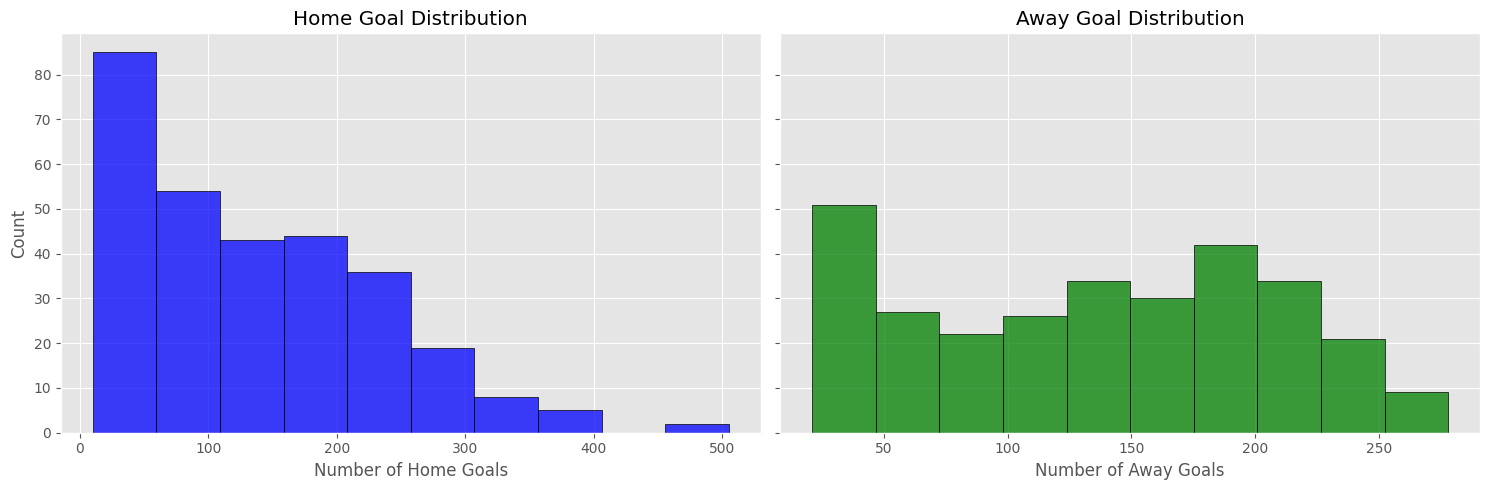

In [216]:
# Calculate total goals scored by home teams
home_team_goals = table_match_new.groupby('home_team')['home_team_goal'].sum().reset_index()
home_team_goals = home_team_goals.rename(columns={'home_team_goal': 'total_home_goals'})

# Calculate total goals scored by away teams (use home_team_goal for away matches)
away_team_goals = table_match_new.groupby('away_team')['home_team_goal'].sum().reset_index()
away_team_goals = away_team_goals.rename(columns={'home_team_goal': 'total_away_goals'})

# Sort the results for visualization
home_team_goals = home_team_goals.sort_values(by='total_home_goals', ascending=False)
away_team_goals = away_team_goals.sort_values(by='total_away_goals', ascending=False)

# Visualize the distribution of goals
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.histplot(home_team_goals['total_home_goals'], ax=axes[0], bins=10, color='blue', edgecolor='black')
axes[0].set_xlabel('Number of Home Goals')
axes[0].set_title('Home Goal Distribution')

sns.histplot(away_team_goals['total_away_goals'], ax=axes[1], bins=10, color='green', edgecolor='black')
axes[1].set_xlabel('Number of Away Goals')
axes[1].set_title('Away Goal Distribution')

plt.tight_layout()
plt.show()


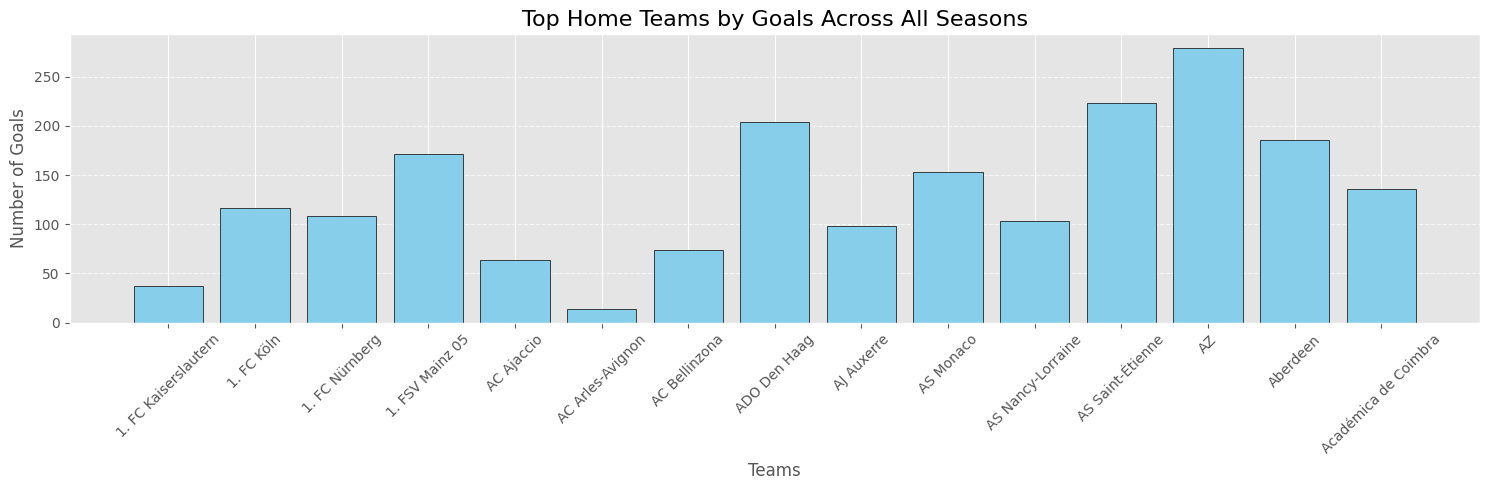

In [217]:
# Visualization of top teams by home goals
plt.figure(figsize=(15, 5))
plt.bar(top_team_goal['home_team'].head(15), top_team_goal['home_team_goal'].head(15), color='skyblue', edgecolor='black')
plt.title('Top Home Teams by Goals Across All Seasons', fontsize=16)
plt.ylabel('Number of Goals', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [220]:
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'away_team_full_name'],
      dtype='object')


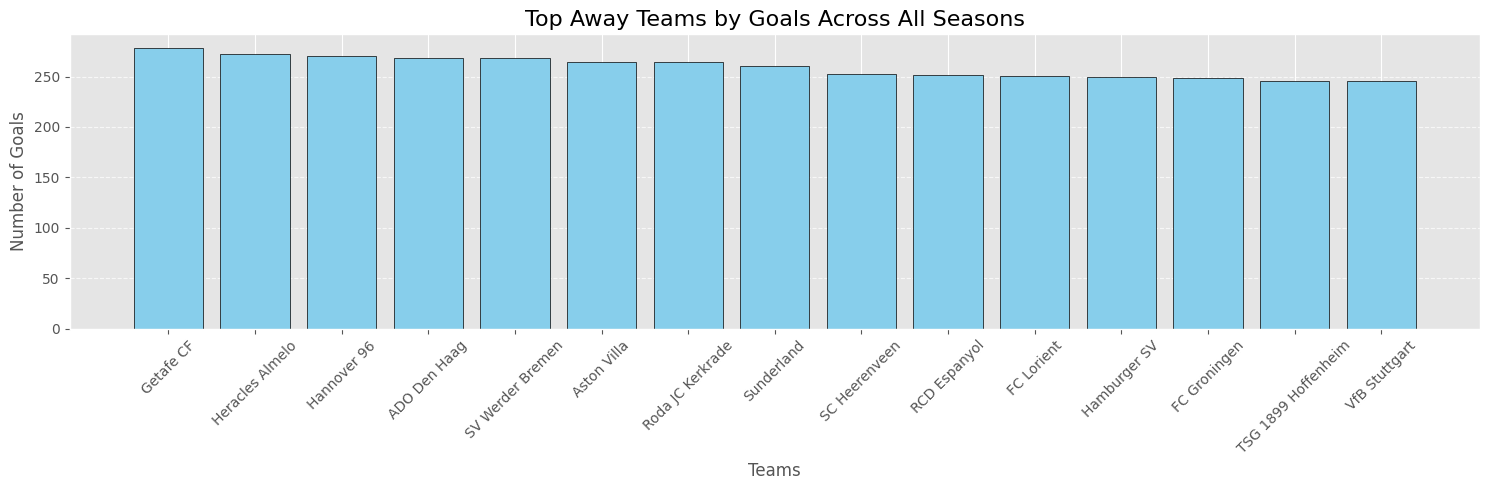

In [221]:
# Group by away team and sum the 'home_team_goal'
top_team_rec = table_match_new.groupby('away_team')['home_team_goal'].sum().reset_index()

# Rename columns appropriately
top_team_rec = top_team_rec.rename(columns={'home_team_goal': 'total_away_goals'})

# Sort the DataFrame by total goals in descending order
top_team_rec = top_team_rec.sort_values(by='total_away_goals', ascending=False)

# Visualize the top away teams based on goals scored
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.bar(top_team_rec['away_team'].head(15), top_team_rec['total_away_goals'].head(15), color='skyblue', edgecolor='black')
plt.title('Top Away Teams by Goals Across All Seasons', fontsize=16)
plt.ylabel('Number of Goals', fontsize=12)
plt.xlabel('Teams', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [225]:
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'away_team_full_name'],
      dtype='object')


In [226]:
# Calculate top home and away team goals per season
top_team_goal_sea = table_match_new.groupby(['home_team', table_match_new['date'].dt.year])['home_team_goal'].sum().reset_index()

# Calculate away team goals from the matches they played as away teams
top_team_rec_sea = table_match_new.groupby(['away_team', table_match_new['date'].dt.year])['home_team_goal'].sum().reset_index()
top_team_rec_sea.rename(columns={'home_team_goal': 'away_team_goal'}, inplace=True)

# Sort the data
top_team_goal_sea = top_team_goal_sea.sort_values(by=['date', 'home_team_goal'], ascending=[True, False])
top_team_rec_sea = top_team_rec_sea.sort_values(by=['date', 'away_team_goal'], ascending=[True, False])


In [227]:
print(table_match_new.head())

   country_id  stage       date  match_api_id  home_team_goal  \
0           1      1 2008-08-17        492473               1   
1           1      1 2008-08-16        492474               0   
2           1      1 2008-08-16        492475               0   
3           1      1 2008-08-17        492476               5   
4           1      1 2008-08-16        492477               1   

           home_team          away_team   team_long_name_x  \
0           KRC Genk       Beerschot AC           KRC Genk   
1   SV Zulte-Waregem   Sporting Lokeren   SV Zulte-Waregem   
2  KSV Cercle Brugge     RSC Anderlecht  KSV Cercle Brugge   
3           KAA Gent          RAEC Mons           KAA Gent   
4      FCV Dender EH  Standard de Liège      FCV Dender EH   

  team_long_name_away  home_team_id  away_team_id   team_long_name_y  \
0        Beerschot AC          9987          9993           KRC Genk   
1    Sporting Lokeren         10000          9994   SV Zulte-Waregem   
2      RSC Anderlech

In [229]:
# Join home and away team names using Team table
team_mapping = table_team[['team_api_id', 'team_long_name']]

# Merge home team names
table_match_new = table_match_new.merge(
    team_mapping, how='left', left_on='home_team_id', right_on='team_api_id'
).rename(columns={'team_long_name': 'home_team_full_name'})

# Merge away team names
table_match_new = table_match_new.merge(
    team_mapping, how='left', left_on='away_team_id', right_on='team_api_id'
).rename(columns={'team_long_name': 'away_team_full_name'})

# Drop duplicate columns from merging
table_match_new = table_match_new.drop(columns=['team_api_id_x', 'team_api_id_y'])


In [230]:
# Merge away team names
table_match_new = table_match_new.merge(
    team_mapping,
    how='left',
    left_on='away_team_id',  # Make sure this column exists
    right_on='team_api_id'
).rename(columns={'team_long_name': 'away_team_full_name'})


In [231]:
missing_home = table_match_new['home_team_full_name'].isna().sum()
missing_away = table_match_new['away_team_full_name'].isna().sum()

print(f"Missing home team names: {missing_home}")
print(f"Missing away team names: {missing_away}")


Missing home team names: home_team_full_name    25979
home_team_full_name        0
dtype: int64
Missing away team names: away_team_full_name    25979
away_team_full_name    25979
away_team_full_name        0
away_team_full_name        0
dtype: int64


In [234]:
print(table_match_new.columns)

Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'away_team_full_name',
       'home_team_full_name', 'away_team_full_name', 'team_api_id',
       'away_team_full_name'],
      dtype='object')


In [235]:
table_match_new = table_match_new.loc[:, ~table_match_new.columns.duplicated()]
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'team_api_id'],
      dtype='object')


In [236]:
required_columns = ['away_team_goal', 'season']
for col in required_columns:
    if col not in table_match_new.columns:
        print(f"Missing column: {col}")


Missing column: away_team_goal
Missing column: season


In [242]:
print(table_match.columns)


Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)


In [243]:
# Ensure 'away_team_goal' and 'season' are included in `table_match_new`
if 'away_team_goal' not in table_match_new.columns:
    table_match_new = table_match_new.merge(
        table_match[['match_api_id', 'away_team_goal']],
        on='match_api_id',
        how='left'
    )

if 'season' not in table_match_new.columns:
    table_match_new = table_match_new.merge(
        table_match[['match_api_id', 'season']],
        on='match_api_id',
        how='left'
    )


In [244]:
print(table_match_new.columns)


Index(['country_id', 'stage', 'date', 'match_api_id', 'home_team_goal',
       'home_team', 'away_team', 'team_long_name_x', 'team_long_name_away',
       'home_team_id', 'away_team_id', 'team_long_name_y',
       'away_team_full_name', 'home_team_full_name', 'team_api_id',
       'away_team_goal', 'season'],
      dtype='object')


In [245]:
final_columns = [
    'match_api_id', 'date', 'home_team_full_name', 'away_team_full_name', 
    'home_team_goal', 'away_team_goal', 'stage', 'season', 'country_id'
]

final_match_data = table_match_new[final_columns]


In [246]:
print(final_match_data.info())
print(final_match_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   match_api_id         25979 non-null  int64         
 1   date                 25979 non-null  datetime64[ns]
 2   home_team_full_name  0 non-null      object        
 3   away_team_full_name  0 non-null      object        
 4   home_team_goal       25979 non-null  int64         
 5   away_team_goal       25979 non-null  int64         
 6   stage                25979 non-null  int64         
 7   season               25979 non-null  object        
 8   country_id           25979 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 1.8+ MB
None
   match_api_id       date home_team_full_name away_team_full_name  \
0        492473 2008-08-17                 NaN                 NaN   
1        492474 2008-08-16                 NaN     

In [248]:
# Inspect the Team table
print(table_team.head())

# Inspect the match table for home and away team IDs
print(table_match[['home_team_api_id', 'away_team_api_id']].head())


   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB
   home_team_api_id  away_team_api_id
0              9987              9993
1             10000              9994
2              9984              8635
3              9991              9998
4              7947              9985


In [249]:
team_mapping = table_team[['team_api_id', 'team_long_name']]
print(team_mapping.head())


   team_api_id     team_long_name
0         9987           KRC Genk
1         9993       Beerschot AC
2        10000   SV Zulte-Waregem
3         9994   Sporting Lokeren
4         9984  KSV Cercle Brugge


In [250]:
# Merge for home team names
table_match = table_match.merge(
    team_mapping,
    how='left',
    left_on='home_team_api_id',
    right_on='team_api_id'
).rename(columns={'team_long_name': 'home_team_full_name'})

# Merge for away team names
table_match = table_match.merge(
    team_mapping,
    how='left',
    left_on='away_team_api_id',
    right_on='team_api_id'
).rename(columns={'team_long_name': 'away_team_full_name'})

# Drop duplicate `team_api_id` columns if created
table_match = table_match.drop(columns=['team_api_id_x', 'team_api_id_y'], errors='ignore')


In [251]:
print(table_match[['home_team_full_name', 'away_team_full_name']].info())
print(table_match[['home_team_full_name', 'away_team_full_name']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_team_full_name  25979 non-null  object
 1   away_team_full_name  25979 non-null  object
dtypes: object(2)
memory usage: 406.1+ KB
None
  home_team_full_name away_team_full_name
0            KRC Genk        Beerschot AC
1    SV Zulte-Waregem    Sporting Lokeren
2   KSV Cercle Brugge      RSC Anderlecht
3            KAA Gent           RAEC Mons
4       FCV Dender EH   Standard de Liège


In [252]:
missing_home = table_match[table_match['home_team_full_name'].isna()]
missing_away = table_match[table_match['away_team_full_name'].isna()]

print("Missing home teams:")
print(missing_home[['home_team_api_id']].drop_duplicates())

print("Missing away teams:")
print(missing_away[['away_team_api_id']].drop_duplicates())


Missing home teams:
Empty DataFrame
Columns: [home_team_api_id]
Index: []
Missing away teams:
Empty DataFrame
Columns: [away_team_api_id]
Index: []


In [253]:
final_columns = [
    'match_api_id', 'date', 'home_team_full_name', 'away_team_full_name',
    'home_team_goal', 'away_team_goal', 'stage', 'season', 'country_id'
]

final_match_data = table_match[final_columns]
print(final_match_data.head())


   match_api_id                 date home_team_full_name away_team_full_name  \
0        492473  2008-08-17 00:00:00            KRC Genk        Beerschot AC   
1        492474  2008-08-16 00:00:00    SV Zulte-Waregem    Sporting Lokeren   
2        492475  2008-08-16 00:00:00   KSV Cercle Brugge      RSC Anderlecht   
3        492476  2008-08-17 00:00:00            KAA Gent           RAEC Mons   
4        492477  2008-08-16 00:00:00       FCV Dender EH   Standard de Liège   

   home_team_goal  away_team_goal  stage     season  country_id  
0               1               1      1  2008/2009           1  
1               0               0      1  2008/2009           1  
2               0               3      1  2008/2009           1  
3               5               0      1  2008/2009           1  
4               1               3      1  2008/2009           1  


In [254]:
# Total goals by team
total_goals = final_match_data.groupby('home_team_full_name')['home_team_goal'].sum() + \
              final_match_data.groupby('away_team_full_name')['away_team_goal'].sum()

print(total_goals.sort_values(ascending=False).head(10))


home_team_full_name
FC Barcelona         849
Real Madrid CF       843
Celtic               695
FC Bayern Munich     653
PSV                  652
Ajax                 647
FC Basel             619
Manchester City      606
Chelsea              583
Manchester United    582
dtype: int64


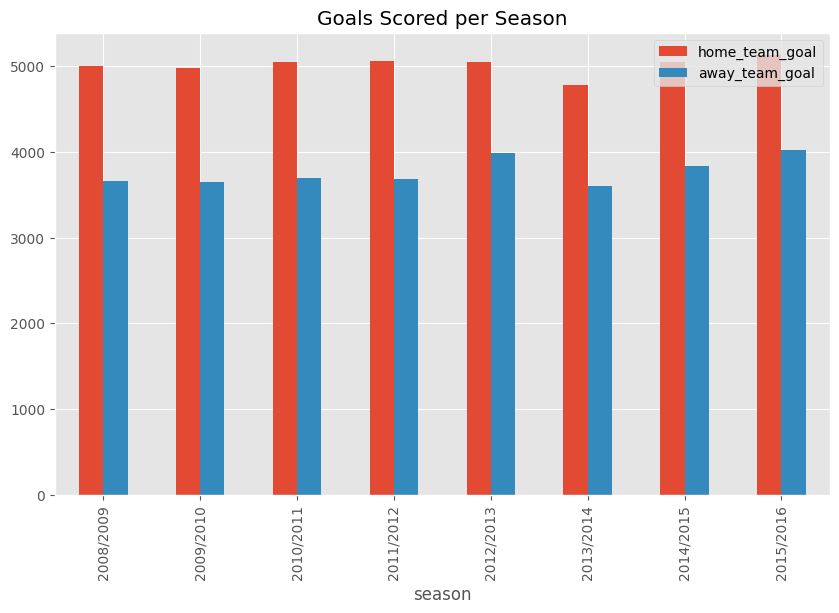

In [256]:
import matplotlib.pyplot as plt

# Goals scored per season
goals_per_season = final_match_data.groupby('season')[['home_team_goal', 'away_team_goal']].sum()
goals_per_season.plot(kind='bar', figsize=(10, 6), title="Goals Scored per Season")
plt.show()


                 home_team  season  home_team_goal
1201         Polonia Bytom    2008              54
1370  Royal Excel Mouscron    2008              38
1267        RSC Anderlecht    2008              30
440           FC Barcelona    2008              28
1452      SV Werder Bremen    2008              27


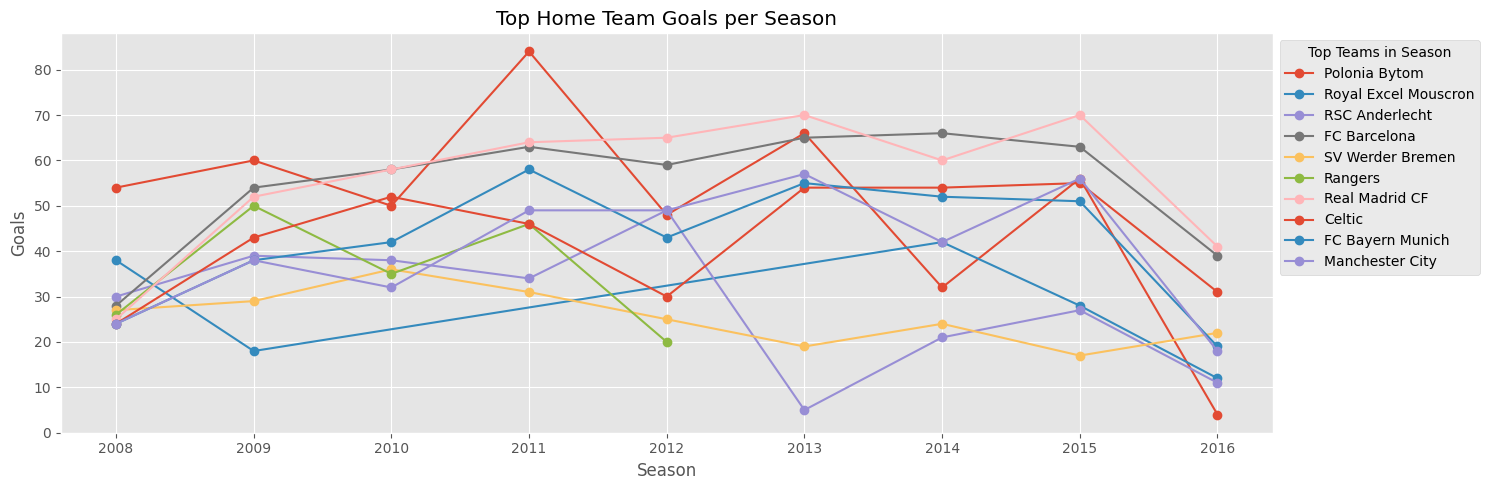

In [258]:
# Aggregate home and away team goals by season
top_team_goal_sea = (
    table_match_sp.groupby(['home_team', table_match_sp['date'].dt.year])['home_team_goal']
    .sum()
    .reset_index()
)
top_team_goal_sea = top_team_goal_sea.rename(columns={'date': 'season'})
top_team_goal_sea = top_team_goal_sea.sort_values(by=['season', 'home_team_goal'], ascending=[True, False])

# Display the aggregated DataFrame
print(top_team_goal_sea.head())

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Get the top 10 unique teams
top_teams = list(top_team_goal_sea['home_team'].unique())[:10]

for team in top_teams:
    # Filter data for each team and sort by season
    team_data = top_team_goal_sea[top_team_goal_sea['home_team'] == team].sort_values(by='season', ascending=True)
    # Plot goals per season for each team
    plt.plot(team_data['season'], team_data['home_team_goal'], marker='o', label=team)

# Plot aesthetics
plt.title('Top Home Team Goals per Season')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(title='Top Teams in Season', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [260]:
# Merge tables by match_api_id
goal_Res = pd.merge(
    df_goals[['match_api_id']],
    table_match_new[['match_api_id', 'home_team_goal', 'away_team_goal', 'home_team', 'away_team']],
    on='match_api_id',
    how='right'
)

# Display merged table
print(goal_Res.head())

   match_api_id  home_team_goal  away_team_goal          home_team  \
0        492473               1               1           KRC Genk   
1        492474               0               0   SV Zulte-Waregem   
2        492475               0               3  KSV Cercle Brugge   
3        492476               5               0           KAA Gent   
4        492477               1               3      FCV Dender EH   

           away_team  
0       Beerschot AC  
1   Sporting Lokeren  
2     RSC Anderlecht  
3          RAEC Mons  
4  Standard de Liège  


In [261]:
### Total Goals at Home
top_team_home_goal = (
    goal_Res.groupby('home_team')['home_team_goal']
    .sum()
    .reset_index()
    .sort_values(by='home_team_goal', ascending=False)
)
print(top_team_home_goal.head())

            home_team  home_team_goal
211    Real Madrid CF             505
75       FC Barcelona             495
49             Celtic             389
77   FC Bayern Munich             382
184               PSV             370


In [262]:
### Total Goals Away
top_team_away_goal = (
    goal_Res.groupby('away_team')['away_team_goal']
    .sum()
    .reset_index()
    .sort_values(by='away_team_goal', ascending=False)
)
print(top_team_away_goal.head())

          away_team  away_team_goal
75     FC Barcelona             354
211  Real Madrid CF             338
49           Celtic             306
15             Ajax             287
184             PSV             282


In [263]:

### Goals Conceded at Home
top_team_home_res = (
    goal_Res.groupby('away_team')['home_team_goal']
    .sum()
    .reset_index()
    .sort_values(by='home_team_goal', ascending=False)
)
print(top_team_home_res.head())

            away_team  home_team_goal
112         Getafe CF             278
125   Heracles Almelo             272
122       Hannover 96             270
7        ADO Den Haag             268
235  SV Werder Bremen             268


In [264]:
### Goals Conceded Away
top_team_away_res = (
    goal_Res.groupby('home_team')['away_team_goal']
    .sum()
    .reset_index()
    .sort_values(by='away_team_goal', ascending=False)
)
print(top_team_away_res.head())

            home_team  away_team_goal
144        Kilmarnock             238
235  SV Werder Bremen             203
229     SC Heerenveen             202
167        Motherwell             201
7        ADO Den Haag             200


In [266]:
print(top_team_goal_sea_filtered.columns)


Index(['home_team', 'season', 'home_team_goal'], dtype='object')


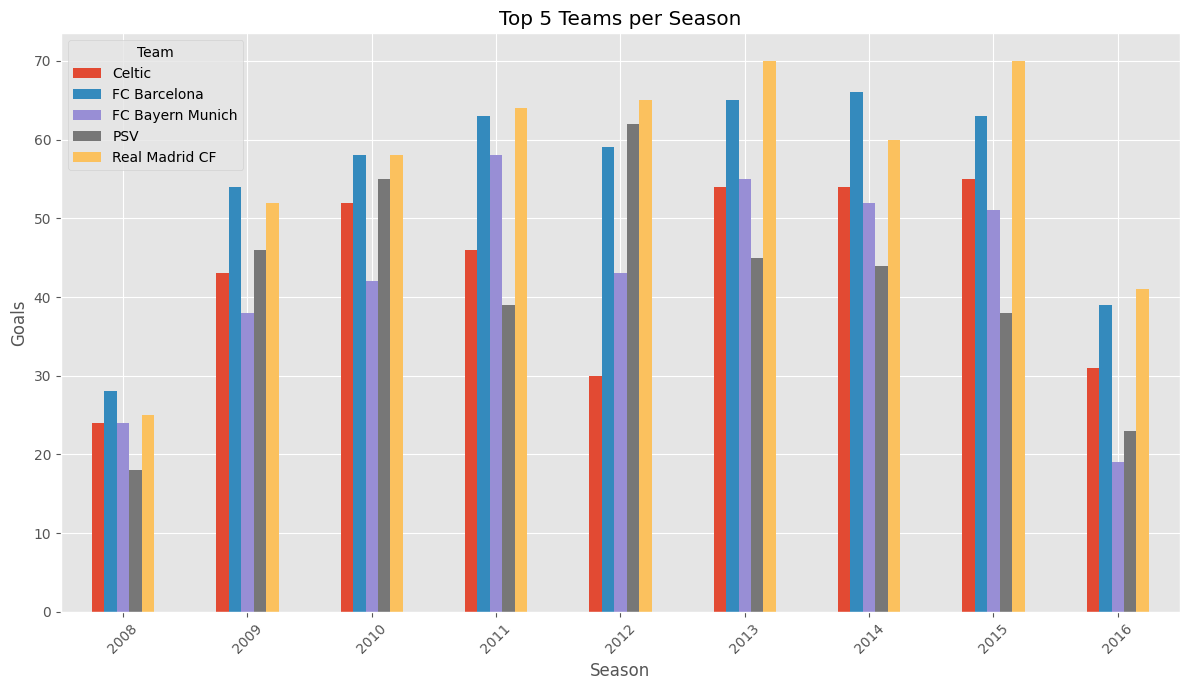

In [267]:
# Group by season and home team
team_performance = top_team_goal_sea_filtered.groupby(['season', 'home_team'])['home_team_goal'].sum().unstack(fill_value=0)

# Plot the performance
team_performance.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Top 5 Teams per Season')
plt.xticks(rotation=45)
plt.legend(title='Team')

plt.tight_layout()
plt.show()


In [270]:
table_player_attr_grp=table_player_new.drop(columns=['date' , 'agility' ,'balance' , 'jumping','shot_power' , 'acceleration', 'sprint_speed' , 'heading_accuracy'  ,'curve'] , axis=1) 

In [271]:
table_player_attr_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_api_id        183978 non-null  int64  
 1   overall_rating       183142 non-null  float64
 2   potential            183142 non-null  float64
 3   preferred_foot       183142 non-null  object 
 4   attacking_work_rate  180748 non-null  object 
 5   defensive_work_rate  183142 non-null  object 
 6   crossing             183142 non-null  float64
 7   finishing            183142 non-null  float64
 8   short_passing        183142 non-null  float64
 9   volleys              181265 non-null  float64
 10  dribbling            183142 non-null  float64
 11  free_kick_accuracy   183142 non-null  float64
 12  long_passing         183142 non-null  float64
 13  ball_control         183142 non-null  float64
 14  reactions            183142 non-null  float64
 15  stamina          

In [272]:
### replace non logic value in attack column
mapping_attack={
    'None' : 'low' ,
    'norm' : 'high',     
    'y'     : 'low',
    'le' : 'low', 
    'stoc' : 'high' 
}
table_player_attr_grp['attacking_work_rate']=table_player_attr_grp['attacking_work_rate'].replace(mapping_attack)

In [273]:
table_player_attr_grp['defensive_work_rate'].unique()


array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

In [274]:
### replace non logic value in defence column

mapping = {
    '_0': 'low',
    'o': 'high',
    '1' : 'high' , 
    '2' : 'high' , 
    '3' : 'high' , 
    '5' : 'high' , 
    '6' : 'high' , 
    '7' : 'high' , 
    '0' : 'high' , 
    '8' : 'high' , 
    '9' : 'low' , 
    '4' : 'high' , 
    'ormal': 'low',
    'ean': 'high',
    'tocky': 'low',
    'es': 'high' ,    
}
table_player_attr_grp['defensive_work_rate'] = table_player_attr_grp['defensive_work_rate'].replace(mapping)

In [275]:
table_player_attr_grp['defensive_work_rate'].value_counts()


defensive_work_rate
medium    130846
high       30881
low        21415
Name: count, dtype: int64

In [286]:
### define categorical and numerical column
catg_colc=['preferred_foot' , 'attacking_work_rate' , 'defensive_work_rate']
num_col = ['overall_rating' , 'potential' , 'crossing' , 'finishing' , 'short_passing' , 
                'volleys' , 'free_kick_accuracy' , 'long_passing' , 'ball_control' , 'reactions' , 
                'stamina' , 'strength'  ,'long_shots' , 'aggression' , 'interceptions' , 'positioning' , 
                  'vision' , 'penalties' , 'marking' , 'standing_tackle' ,'sliding_tackle' , 
                  'gk_diving' ,'gk_handling' , 'gk_kicking' , 'gk_positioning' , 'gk_reflexes']

In [291]:

# Ensure you are working with a copy to avoid SettingWithCopyWarning
numerical_df = table_player_attr_grp[num_col].copy()
categorical_df = table_player_attr_grp[catg_colc].copy()